Создание простых графиков динамики популяций


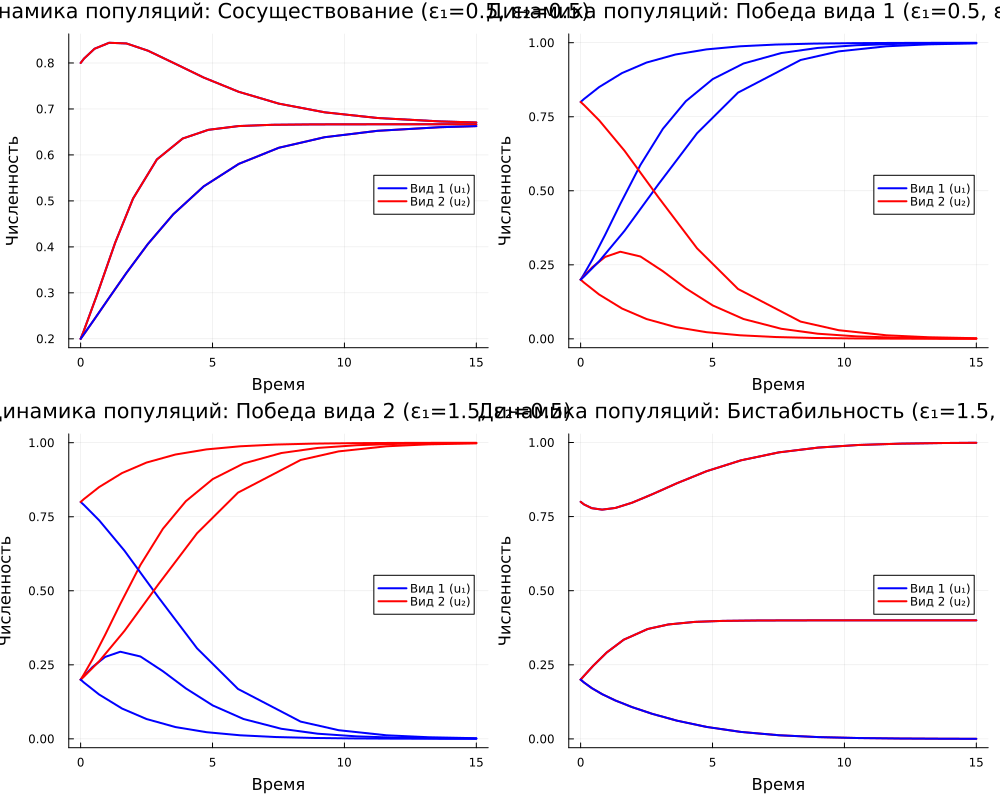

График сохранен как 'simple_population_dynamics.png'

Самый очевидный случай - Сосуществование:
• Оба вида достигают постоянной численности
• Ни один вид не вытесняет другой
• Система стабилизируется


In [1]:
using DifferentialEquations
using Plots

# Простая система уравнений конкуренции
function competition_system!(du, u, p, t)
    u1, u2 = u
    ε1, ε2 = p
    du[1] = u1 * (1 - u1 - ε1 * u2)
    du[2] = u2 * (1 - u2 - ε2 * u1)
end

# Функция для построения графиков численности от времени
function plot_population_dynamics(ε1, ε2, scenario_name)
    # Начальные условия
    initial_conditions = [
        [0.2, 0.2], [0.8, 0.2], [0.2, 0.8]
    ]

    # Создаем график
    p = plot(xlabel="Время", ylabel="Численность",
             title="Динамика популяций: $scenario_name",
             legend=:right, size=(600, 400), grid=true)

    colors = [:blue :red]
    labels = ["Вид 1 (u₁)" "Вид 2 (u₂)"]

    for (i, u0) in enumerate(initial_conditions)
        prob = ODEProblem(competition_system!, u0, (0.0, 15.0), [ε1, ε2])
        sol = solve(prob, Tsit5())

        # Рисуем оба вида на одном графике
        if i == 1
            plot!(p, sol.t, [sol[1,:] sol[2,:]],
                  linewidth=2, color=colors, label=labels)
        else
            plot!(p, sol.t, [sol[1,:] sol[2,:]],
                  linewidth=2, color=colors, label="")
        end
    end

    return p
end

# Создаем графики для 4 основных случаев
println("Создание простых графиков динамики популяций")

# 1. Сосуществование
p1 = plot_population_dynamics(0.5, 0.5, "Сосуществование (ε₁=0.5, ε₂=0.5)")

# 2. Победа вида 1
p2 = plot_population_dynamics(0.5, 1.5, "Победа вида 1 (ε₁=0.5, ε₂=1.5)")

# 3. Победа вида 2
p3 = plot_population_dynamics(1.5, 0.5, "Победа вида 2 (ε₁=1.5, ε₂=0.5)")

# 4. Бистабильность
p4 = plot_population_dynamics(1.5, 1.5, "Бистабильность (ε₁=1.5, ε₂=1.5)")

# Объединяем все графики
combined_plot = plot(p1, p2, p3, p4, layout=(2,2), size=(1000, 800))

# Показываем и сохраняем
display(combined_plot)
savefig(combined_plot, "simple_population_dynamics.png")

println("График сохранен как 'simple_population_dynamics.png'")

# Простой анализ для самого очевидного случая
println("\nСамый очевидный случай - Сосуществование:")
println("• Оба вида достигают постоянной численности")
println("• Ни один вид не вытесняет другой")
println("• Система стабилизируется")